In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pipeline import LBP_3DT




In [2]:
mapping=pd.read_csv('../Datasets/XV Clinical Data/WCH_XV_genotypes.csv')
mapping.columns=['Record ID','Condition']
mapping=dict(zip(mapping['Record ID'],mapping['Condition']))


csv_dir = '../Datasets/XV Clinical Data'
csv_files = [fold for fold in os.listdir(csv_dir) if os.path.isdir(os.path.join(csv_dir, fold)) and 'WCH' in fold]


dataframes=[]
control=[]
cf=[]
for fold in csv_files:
    p=os.path.join(csv_dir, fold)
    key=int(p.split('-')[2])-10000
    files=[f for f in os.listdir(p) if os.path.isdir(os.path.join(p, f)) and '-LOBAR' not in f and 'WCH' in f]
    curr_csv=[]
    for f in files:
        path=os.path.join(p, f)
        csv=[pd.read_csv(os.path.join(path,c)) for c in os.listdir(path) if c.endswith('_final.csv')]
        if 'EXP' in f:
            csv[0]['Frame']=csv[0]['Frame']+7
        curr_csv.extend(csv)
    

    dataframes.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    if 'Control' in mapping[key]:
        control.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    else:
        cf.append(pd.merge(curr_csv[0], curr_csv[1], how='outer'))
    





    
    





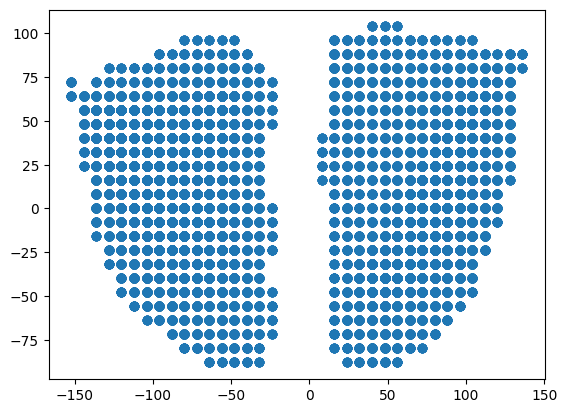

In [3]:
df=control[0]
df.columns=['Frame','SV','X','Y','Z']

plt.scatter(df['X'],df['Z'])

In [4]:
dataframes=[]
for c in control:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,0])
for c in cf:
    c.columns=['Frame','SV','X','Y','Z']
    dataframes.append([c,1])

lbp=LBP_3DT(dataframes)

features=lbp.extract()



152 96 132
[1, 8, 4, 3, 13, 51, 20, 4, 5, 19, 12, 1, 3, 8, 6, 1, 10, 42, 12, 11, 65, 213, 150, 63, 22, 130, 16, 14, 5, 37, 19, 8, 13, 29, 8, 7, 44, 349, 68, 41, 16, 33, 20, 13, 7, 23, 16, 5, 0, 5, 1, 2, 3, 60, 18, 14, 0, 4, 5, 0, 1, 9, 4, 4] 1798
[3, 3, 4, 0, 12, 98, 36, 4, 7, 7, 17, 0, 3, 3, 6, 1, 8, 25, 47, 9, 79, 477, 244, 28, 16, 11, 124, 11, 5, 13, 53, 6, 6, 3, 8, 2, 12, 108, 98, 12, 6, 10, 9, 3, 1, 4, 7, 3, 2, 1, 2, 0, 7, 72, 29, 3, 4, 2, 7, 2, 0, 6, 6, 3] 1798
[4, 5, 11, 0, 16, 93, 33, 5, 4, 1, 22, 3, 1, 1, 9, 0, 17, 34, 45, 4, 92, 429, 213, 27, 16, 35, 137, 5, 5, 23, 44, 2, 4, 1, 7, 0, 23, 227, 74, 6, 3, 4, 7, 2, 1, 2, 11, 1, 0, 1, 7, 2, 4, 21, 22, 0, 4, 3, 15, 0, 0, 0, 10, 0] 1798
[5, 9, 11, 2, 21, 66, 37, 2, 9, 11, 25, 2, 2, 7, 13, 0, 22, 44, 65, 9, 73, 263, 193, 38, 33, 71, 122, 17, 3, 41, 53, 8, 3, 23, 13, 0, 24, 184, 54, 5, 2, 20, 22, 2, 0, 9, 21, 0, 3, 2, 11, 2, 11, 19, 38, 6, 4, 7, 17, 4, 1, 1, 11, 2] 1798
[10, 7, 18, 6, 9, 43, 44, 4, 13, 19, 36, 4, 4, 5, 10, 2, 27, 34, 

KeyboardInterrupt: 

[]